In [104]:
import pandas as pd
import datetime
import random
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
import plotly.graph_objects as go

In [105]:
aa = pd.read_csv("dataset_joined.csv").drop(columns=['Unnamed: 0', 'pregunta_1',
       'pregunta_2', 'pregunta_3', 'pregunta_4', 'pregunta_5', 'pregunta_6',
       'pregunta_7', 'pregunta_8', 'pregunta_9', 'pregunta_10', 'pregunta_11',
       'pregunta_12', 'pregunta_13', "barrio",
       'poblacion_por_barrio'])

In [106]:
aa["fecha"]  = pd.to_datetime(aa['fecha'], format='%Y-%m-%d')
#aa["hora"] = pd.to_datetime(aa['hora'], format='%Y-%m-%d')
#date_dt2 = datetime.strptime(date_str2, '%y/%m/%d')

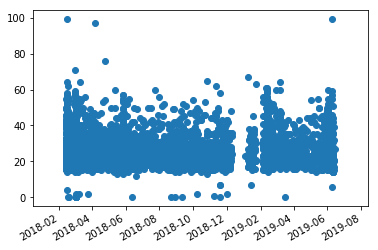

In [107]:
# plot
plt.scatter(aa["fecha"],aa["edad"])
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.show()

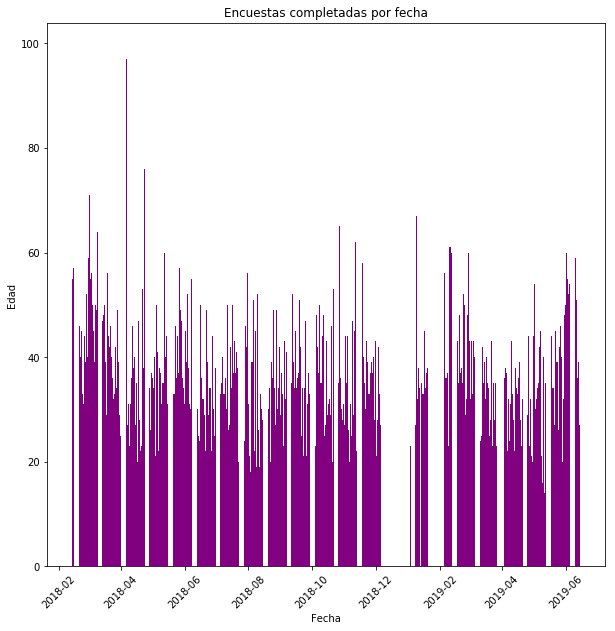

<Figure size 432x288 with 0 Axes>

In [108]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.bar(aa["fecha"],
        aa["edad"],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Fecha",
       ylabel="Edad",
       title="Encuestas completadas por fecha")

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()
plt.savefig('encuestascompletadasporfecha.png')

In [109]:
aa_mujer_mask = aa.genero == "Mujer"
aa_mujer = aa[aa_mujer_mask]
aa_mujer= aa_mujer.apply(lambda x: x.astype(str).str.upper())
aa_mujer.rename(columns = {'barrio_completo':'BARRIO'}, inplace = True) 
aa_varon_mask = aa.genero == "Hombre"
aa_varon = aa[aa_varon_mask]
aa_varon= aa_varon.apply(lambda x: x.astype(str).str.upper())
aa_varon.rename(columns = {'barrio_completo':'BARRIO'}, inplace = True) 

In [110]:
aa_mujer2 = aa_mujer[["genero","fecha"]]
aa_varon2 =  aa_varon[["genero","fecha"]]
otro_mask = aa.genero == "Otro"
aa_otro = aa[otro_mask]

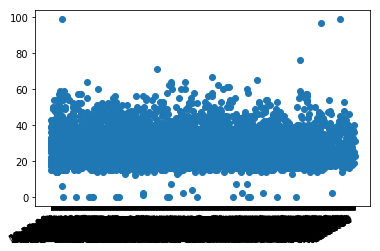

<Figure size 288000x288000 with 0 Axes>

In [111]:
import datetime
import random
import matplotlib.pyplot as plt

# plot
plt.scatter(aa["hora"],aa["edad"])
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.figure(figsize=(4000,4000))
plt.show()

### Probamos otra cosa con fechas

In [163]:
aver = aa[["fecha","hora","genero"]]
aver['poraño'] = aver['fecha'].map(lambda x: x.strftime('%Y'))
grouped_df = aver.groupby('fecha').size()


/home/thomas/anaconda3/envs/dhdsblend/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [181]:
grafico_fecha = pd.DataFrame(grouped_df.reset_index(name = "Encuestas completadas"))
grafico_fecha.head(4)

,fecha,Encuestas completadas
0,2018-02-14,67
1,2018-02-15,118
2,2018-02-16,644
3,2018-02-17,298


In [182]:
fig = px.bar(grafico_fecha, x="fecha", y="Encuestas completadas")
fig.show()

In [183]:
fig = go.Figure([go.Scatter(x=grafico_fecha['fecha'], y=grafico_fecha["Encuestas completadas"])])
fig.show()

In [185]:
grouped_hora = aver.groupby('hora').size()
grafico_hora = pd.DataFrame(grouped_hora.reset_index(name = "Encuestas completadas"))
fig = px.bar(grafico_hora, x="hora", y="Encuestas completadas")
fig.show()

### Probamos otra cosa con horarios

In [179]:
aver["hora"] = pd.to_datetime(aver['hora'], format='%H:%M:%S')
aver['hora'] = aver['hora'].map(lambda x: x.strftime('%T'))

grouped_hora = aver.groupby('hora').size()
grafico_hora = pd.DataFrame(grouped_hora.reset_index(name = "Encuestas completadas"))


fig = px.bar(grafico_hora, x="hora", y="Encuestas completadas")
fig.show()

/home/thomas/anaconda3/envs/dhdsblend/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/thomas/anaconda3/envs/dhdsblend/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Vemos de hacer por género

In [118]:
aver["hora"] = pd.to_datetime(aver['hora'], format='%H:%M:%S')
aver['hora'] = aver['hora'].map(lambda x: x.strftime('%T'))
aver.dtypes

/home/thomas/anaconda3/envs/dhdsblend/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/thomas/anaconda3/envs/dhdsblend/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



fecha     datetime64[ns]
hora              object
genero            object
poraño            object
dtype: object

In [119]:
aver_hombre_m = aver.genero == "Hombre"
aver_hombre = aver[aver_hombre_m]

aver_mujer_m= aver.genero == "Mujer"
aver_mujer = aver[aver_mujer_m]

aver_otro_m= aver.genero == "Otro"
aver_otro = aver[aver_otro_m]

In [120]:
hombre_fecha = aver_hombre.groupby('fecha').size()
hombre_fecha = pd.DataFrame(hombre_fecha.reset_index(name = "Group_Count"))


mujer_fecha = aver_mujer.groupby('fecha').size()
mujer_fecha = pd.DataFrame(mujer_fecha.reset_index(name = "Group_Count"))


otro_fecha = aver_otro.groupby('fecha').size()
otro_fecha = pd.DataFrame(otro_fecha.reset_index(name = "Group_Count"))

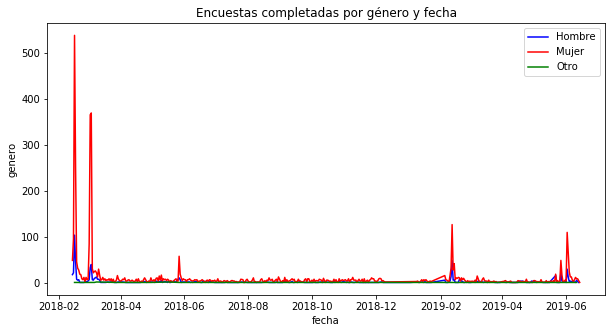

In [121]:
plt.figure(figsize=(10, 5))
plt.plot(hombre_fecha['fecha'], hombre_fecha['Group_Count'], 'b-', label = 'Hombre')
plt.plot(mujer_fecha['fecha'], mujer_fecha['Group_Count'], 'r-',color="red", label = 'Mujer')
plt.plot(otro_fecha['fecha'], otro_fecha['Group_Count'], 'r-',color="green", label = 'Otro')
plt.xlabel('fecha'); plt.ylabel('genero'); plt.title('Encuestas completadas por género y fecha')
plt.legend();

### Intentamos agrupar por hora

In [149]:
#aver.set_index('hora',inplace=True)
#aver.index = pd.to_datetime(aver.index)

In [162]:
#aver.groupby(pd.Grouper(freq="H"))

In [166]:
prueba = aver

In [170]:
prueba.set_index('fecha',inplace=True)

In [178]:
prueba.groupby([pd.Grouper(freq="1H"), "hora"]).sum()

genero poraño
fecha      hora                   
2018-02-14 18:51:00  Hombre   2018
           19:06:00   Mujer   2018
           19:26:00   Mujer   2018
           19:27:00   Mujer   2018
           19:29:00   Mujer   2018
...                     ...    ...
2019-06-13 14:29:00  Hombre   2019
           16:10:00   Mujer   2019
           16:33:00   Mujer   2019
           23:20:00   Mujer   2019
2019-06-14 09:09:00   Mujer   2019

[5193 rows x 2 columns]